## CS418 Project
### Dinh Dang Khoa Tran notebooks


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stat_df = pd.read_csv('player_stat.csv', index_col = 'Rk')

In [3]:
stat_df.head(10)

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
Rk,,,,,,,,,,,,,,,,,,,,,
1,Shai Gilgeous-Alexander,26,OKC,PG,62,62,2122,703,1340,0.525,...,319,384,112,65,157,140,2038,0,NaN,gilgesh01
2,Anthony Edwards,23,MIN,SG,63,63,2296,566,1282,0.441,...,377,289,72,38,207,116,1713,0,NaN,edwaran01
3,Nikola Jokić,29,DEN,C,58,58,2108,638,1112,0.574,...,750,611,103,39,192,128,1669,29,NaN,jokicni01
4,Jayson Tatum,26,BOS,PF,60,60,2192,554,1218,0.455,...,531,349,68,32,175,134,1629,2,NaN,tatumja01
5,Jalen Brunson,28,NYK,PG,61,61,2162,558,1138,0.490,...,181,452,58,6,153,132,1606,0,NaN,brunsja01
6,Giannis Antetokounmpo,30,MIL,PF,51,51,1730,627,1037,0.605,...,614,298,40,61,168,125,1575,6,NaN,antetgi01
7,Cade Cunningham,23,DET,PG,60,60,2118,570,1230,0.463,...,364,555,62,45,274,163,1538,8,NaN,cunnica01
8,Devin Booker,28,PHO,SG,58,58,2170,499,1091,0.457,...,232,398,61,14,162,154,1506,0,NaN,bookede01
9,Donovan Mitchell,28,CLE,SG,60,60,1875,502,1113,0.451,...,260,285,79,12,125,118,1452,0,NaN,mitchdo01


In [4]:
stat_df.shape

(688, 32)

In [5]:
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, 1 to 551
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             688 non-null    object 
 1   Age                688 non-null    int64  
 2   Team               688 non-null    object 
 3   Pos                688 non-null    object 
 4   G                  688 non-null    int64  
 5   GS                 688 non-null    int64  
 6   MP                 688 non-null    int64  
 7   FG                 688 non-null    int64  
 8   FGA                688 non-null    int64  
 9   FG%                677 non-null    float64
 10  3P                 688 non-null    int64  
 11  3PA                688 non-null    int64  
 12  3P%                635 non-null    float64
 13  2P                 688 non-null    int64  
 14  2PA                688 non-null    int64  
 15  2P%                668 non-null    float64
 16  eFG%               677 non-null

### first observe
- there are totally 32 columns in this dataset
- the shape is 688x32
- some of them are nan values
- there are 3 types of data, object, int and float
- the Award column is all nan value -> this is the data of current season so there is no award yet?

## DATA EXPLAINATION
- Player – Player name
- Age – Player's age
- Team – Team name
- Pos – Position
- G – Games played
- GS – Games started
- MP – Minutes played
- FG – Field goals made
- FGA – Field goals attempted
- FG% – Field goal percentage
- 3P – 3-point field goals made
- 3PA – 3-point field goals attempted
- 3P% – 3-point field goal percentage
- 2P – 2-point field goals made
- 2PA – 2-point field goals attempted
- 2P% – 2-point field goal percentage
- eFG% – Effective field goal percentage
- FT – Free throws made
- FTA – Free throws attempted
- FT% – Free throw percentage
- ORB – Offensive rebounds
- DRB – Defensive rebounds
- TRB – Total rebounds
- AST – Assists
- STL – Steals
- BLK – Blocks
- TOV – Turnovers
- PF – Personal fouls
- PTS – Points scored
- Trp-Dbl – Triple-doubles
- Awards – Number of awards
- Player-additional – Player id (as string)

## DATA CLEANING

In [6]:
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, 1 to 551
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             688 non-null    object 
 1   Age                688 non-null    int64  
 2   Team               688 non-null    object 
 3   Pos                688 non-null    object 
 4   G                  688 non-null    int64  
 5   GS                 688 non-null    int64  
 6   MP                 688 non-null    int64  
 7   FG                 688 non-null    int64  
 8   FGA                688 non-null    int64  
 9   FG%                677 non-null    float64
 10  3P                 688 non-null    int64  
 11  3PA                688 non-null    int64  
 12  3P%                635 non-null    float64
 13  2P                 688 non-null    int64  
 14  2PA                688 non-null    int64  
 15  2P%                668 non-null    float64
 16  eFG%               677 non-null

In [7]:
# drop the column award
stat_df = stat_df.drop(columns=['Awards'])

In [8]:
#FG% and 3P%, let view them
nan_values_FG = stat_df[stat_df['FG%'].isna()]
nan_values_3P = stat_df[stat_df['3P%'].isna()]


In [9]:
nan_values_FG.head()

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Player-additional
Rk,,,,,,,,,,,,,,,,,,,,,
284,Vasilije Micić,31,PHO,PG,1,0,2,0,0,NaN,...,0,0,0,0,0,0,0,0,0,micicva01
476,Sidy Cissoko,20,POR,SF,3,0,6,0,0,NaN,...,0,1,0,0,0,1,1,0,0,cissosi01
536,Tony Bradley,27,IND,C,2,0,2,0,0,NaN,...,1,1,0,0,0,0,0,0,0,bradlto01
537,Jesse Edwards,24,MIN,C,2,0,5,0,0,NaN,...,0,0,1,0,0,0,2,0,0,edwarje01
541,Mac McClung,26,ORL,SG,1,0,5,0,0,NaN,...,1,1,2,0,0,0,0,0,0,mccluma01


In [10]:
nan_values_3P.head()

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Player-additional
Rk,,,,,,,,,,,,,,,,,,,,,
55,Ivica Zubac,27,LAC,C,62,62,2017,439,712,0.617,...,550,777,155,48,71,100,134,990,0,zubaciv01
105,Jalen Duren,21,DET,C,62,62,1604,289,414,0.698,...,424,638,161,48,72,113,202,701,0,durenja01
129,Daniel Gafford,26,DAL,C,51,28,1115,253,362,0.699,...,211,350,73,21,96,61,136,627,0,gaffoda01
132,Rudy Gobert,32,MIN,C,56,56,1851,242,368,0.658,...,384,581,103,40,85,76,136,620,0,goberru01
267,Dereck Lively II,20,DAL,C,32,25,768,124,177,0.701,...,152,251,84,17,54,39,94,292,0,livelde01


### observation
- the FG% is nan because these players dont score any point -> fill them with 0s
- the 3P% is nan because they are 0s also -> fill them with 0s

In [11]:
stat_df['FG%'] = stat_df['FG%'].fillna(0)
stat_df['3P%'] = stat_df['3P%'].fillna(0)
stat_df['eFG%'] = stat_df['eFG%'].fillna(0)

In [12]:
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, 1 to 551
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             688 non-null    object 
 1   Age                688 non-null    int64  
 2   Team               688 non-null    object 
 3   Pos                688 non-null    object 
 4   G                  688 non-null    int64  
 5   GS                 688 non-null    int64  
 6   MP                 688 non-null    int64  
 7   FG                 688 non-null    int64  
 8   FGA                688 non-null    int64  
 9   FG%                688 non-null    float64
 10  3P                 688 non-null    int64  
 11  3PA                688 non-null    int64  
 12  3P%                688 non-null    float64
 13  2P                 688 non-null    int64  
 14  2PA                688 non-null    int64  
 15  2P%                668 non-null    float64
 16  eFG%               688 non-null

In [13]:
#free throw percentage can be calculate by taking FT devided by FTA
stat_df.loc[stat_df['FT%'].isna(), 'FT%'] = (
    stat_df.loc[stat_df['FT%'].isna(), 'FT'] /
    stat_df.loc[stat_df['FT%'].isna(), 'FTA']
).fillna(0)

In [14]:
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, 1 to 551
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             688 non-null    object 
 1   Age                688 non-null    int64  
 2   Team               688 non-null    object 
 3   Pos                688 non-null    object 
 4   G                  688 non-null    int64  
 5   GS                 688 non-null    int64  
 6   MP                 688 non-null    int64  
 7   FG                 688 non-null    int64  
 8   FGA                688 non-null    int64  
 9   FG%                688 non-null    float64
 10  3P                 688 non-null    int64  
 11  3PA                688 non-null    int64  
 12  3P%                688 non-null    float64
 13  2P                 688 non-null    int64  
 14  2PA                688 non-null    int64  
 15  2P%                668 non-null    float64
 16  eFG%               688 non-null

## VISUALIZATION

### POSITION vs PTS (vs 3P, vs 2P, vs FG)

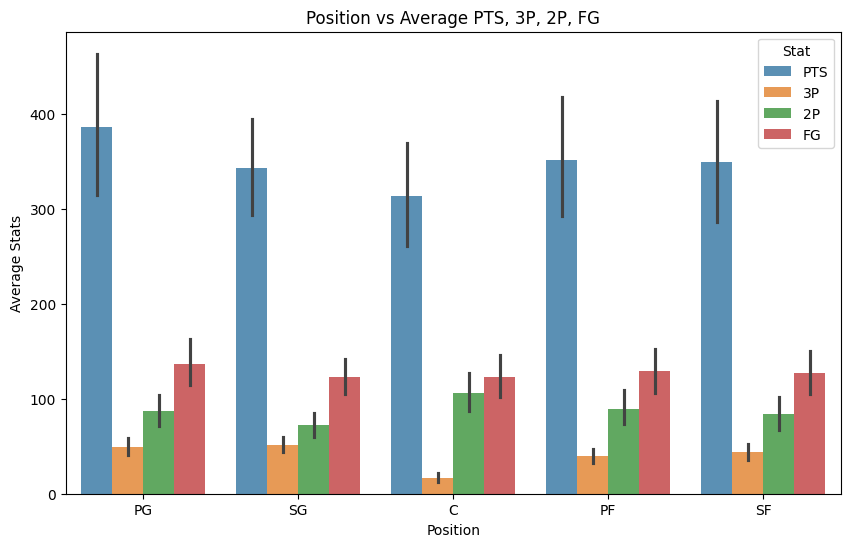

In [15]:
# Reshape the dataframe
melted_df = stat_df.melt(id_vars=['Pos'], value_vars=['PTS', '3P', '2P', 'FG'], var_name='Stat', value_name='Value')

# Plot with catplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Pos', y='Value', hue='Stat', data=melted_df, alpha=0.8)

plt.title('Position vs Average PTS, 3P, 2P, FG')
plt.xlabel('Position')
plt.ylabel('Average Stats')
plt.legend(title='Stat')

plt.show()


### How Pos impact Player's shooting stat
- C tends to got least 3P because they play inside the 3pt zone and under the basket
- PG and SG got the highest 3P because they play outside the box and usually do a 3pts
- In contrast, C got most 2P and PG, SG got fewer
- PF and SF like the average


### AGE vs PTS (vs 3P, vs 2P, vs FG)

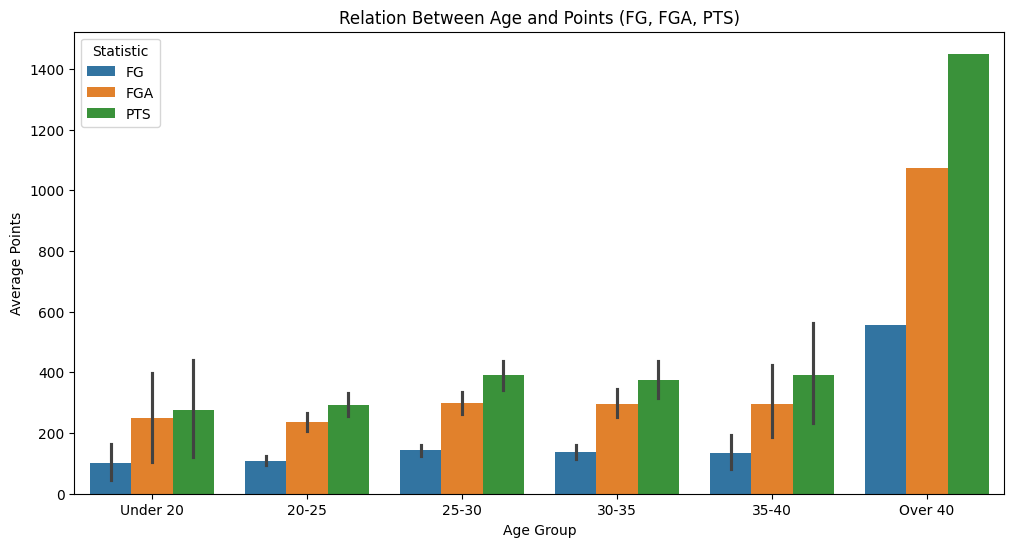

In [26]:
bins = [0, 20, 25, 30, 35, 40, 100]
labels = ['Under 20', '20-25', '25-30', '30-35', '35-40', 'Over 40']
stat_df['Age Group'] = pd.cut(stat_df['Age'], bins=bins, labels=labels, right=False)

# Grouping and reshaping data for seaborn
melted_age_df = stat_df.melt(id_vars=['Age Group'], value_vars=['FG', 'FGA', 'PTS'], var_name='Stat', value_name='Value')

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_age_df, x='Age Group', y='Value', hue='Stat')
plt.title('Relation Between Age and Points (FG, FGA, PTS)')
plt.xlabel('Age Group')
plt.ylabel('Average Points')
plt.legend(title='Statistic')
plt.show()

### It is really supprise that player that over 40 got an outstanding stat, lets see why

In [27]:
over_40 = stat_df[stat_df['Age'] >= 40]
over_40

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Player-additional,Age Group
Rk,,,,,,,,,,,,,,,,,,,,,
10,LeBron James,40,LAL,SF,58,58,2023,555,1073,0.517,...,476,495,52,35,226,85,1450,10,jamesle01,Over 40


### there is only 1 player over 40, and he is such a good player -> the stat is high, let bin again

In [28]:
#let's count the value by bins first
stat_df['Age Group'].value_counts()

Age Group
20-25       279
25-30       255
30-35       116
35-40        28
Under 20      9
Over 40       1
Name: count, dtype: int64

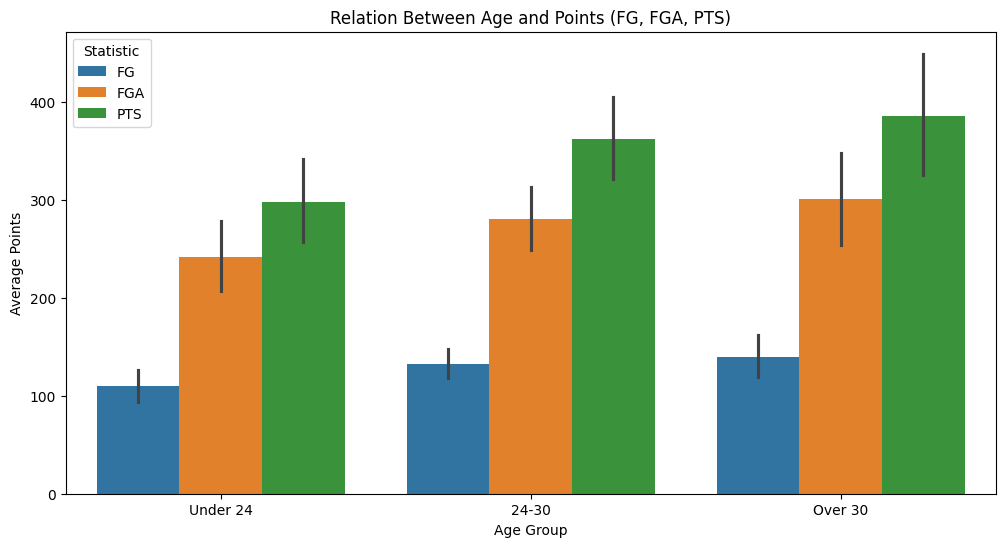

In [30]:
bins = [0, 24, 30, 100]
labels = ['Under 24', '24-30','Over 30']
stat_df['Age Group'] = pd.cut(stat_df['Age'], bins=bins, labels=labels, right=False)

# Grouping and reshaping data for seaborn
melted_age_df = stat_df.melt(id_vars=['Age Group'], value_vars=['FG', 'FGA', 'PTS'], var_name='Stat', value_name='Value')

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_age_df, x='Age Group', y='Value', hue='Stat')
plt.title('Relation Between Age and Points (FG, FGA, PTS)')
plt.xlabel('Age Group')
plt.ylabel('Average Points')
plt.legend(title='Statistic')
plt.show()

### as observe, as the age is large  the players tends to got more point in average (this is stat in one season not in whole career)
### let see if they got higher point by make more attempt or got higher accuracy or both

Average FG% (Field Goal Percentage)
Age < 28: 0.44
Age >= 28: 0.45

Average FGA (Field Goal Attempts)
Age < 28: 249.73
Age >= 28: 322.44


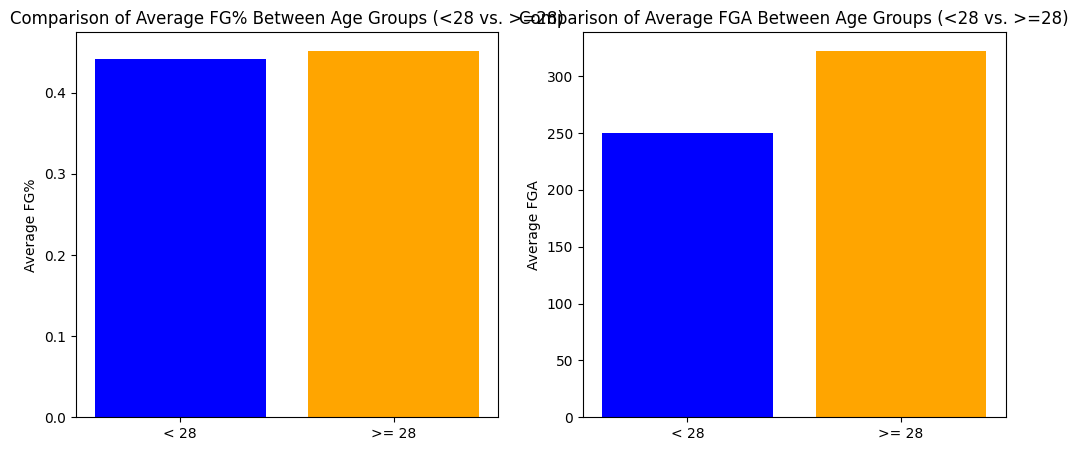

In [60]:
# Split the data into two age groups
lower_28 = stat_df[stat_df['Age'] < 28]
higher_28 = stat_df[stat_df['Age'] >= 28]

# Calculate the mean of the metrics you want to compare
mean_fg_lower = lower_28['FG%'].mean()
mean_fg_higher = higher_28['FG%'].mean()

mean_fga_lower = lower_28['FGA'].mean()
mean_fga_higher = higher_28['FGA'].mean()

# Print the average results
print("Average FG% (Field Goal Percentage)")
print(f"Age < 28: {mean_fg_lower:.2f}")
print(f"Age >= 28: {mean_fg_higher:.2f}\n")

print("Average FGA (Field Goal Attempts)")
print(f"Age < 28: {mean_fga_lower:.2f}")
print(f"Age >= 28: {mean_fga_higher:.2f}")

# Plotting the comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for FG%
ax[0].bar(['< 28', '>= 28'], [mean_fg_lower, mean_fg_higher], color=['blue', 'orange'])
ax[0].set_title('Comparison of Average FG% Between Age Groups (<28 vs. >=28)')
ax[0].set_ylabel('Average FG%')

# Bar plot for FGA
ax[1].bar(['< 28', '>= 28'], [mean_fga_lower, mean_fga_higher], color=['blue', 'orange'])
ax[1].set_title('Comparison of Average FGA Between Age Groups (<28 vs. >=28)')
ax[1].set_ylabel('Average FGA')

plt.show()


### the older players got both higher accuracy and higher attempt

Average 3P% (Three-Point Percentage)
Age < 28: 0.28
Age >= 28: 0.32

Average 3PA (Three-Point Attempts)
Age < 28: 102.91
Age >= 28: 137.46


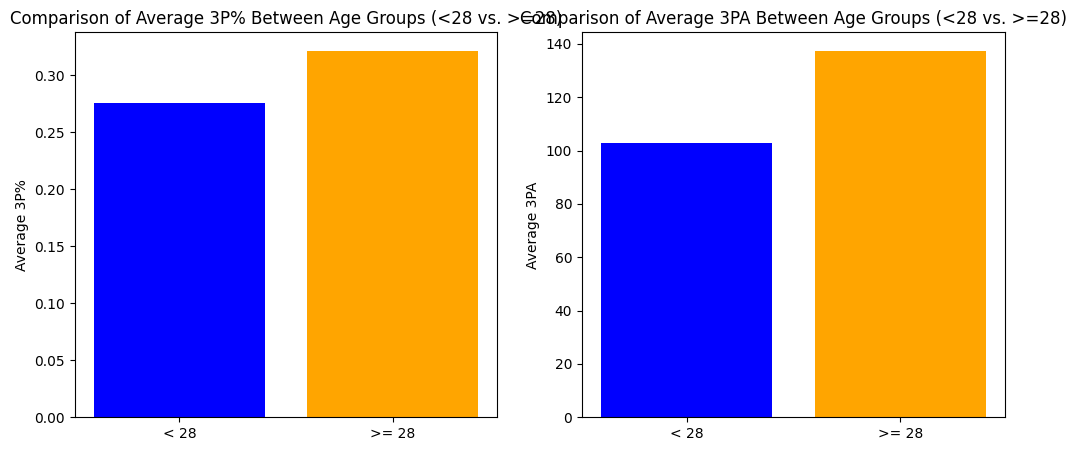

In [61]:
# Split the data into two age groups
lower_28 = stat_df[stat_df['Age'] < 28]
higher_28 = stat_df[stat_df['Age'] >= 28]

# Calculate the mean of the metrics you want to compare
mean_3p_lower = lower_28['3P%'].mean()
mean_3p_higher = higher_28['3P%'].mean()

mean_3pa_lower = lower_28['3PA'].mean()
mean_3pa_higher = higher_28['3PA'].mean()

# Print the average results
print("Average 3P% (Three-Point Percentage)")
print(f"Age < 28: {mean_3p_lower:.2f}")
print(f"Age >= 28: {mean_3p_higher:.2f}\n")

print("Average 3PA (Three-Point Attempts)")
print(f"Age < 28: {mean_3pa_lower:.2f}")
print(f"Age >= 28: {mean_3pa_higher:.2f}")

# Plotting the comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for 3P%
ax[0].bar(['< 28', '>= 28'], [mean_3p_lower, mean_3p_higher], color=['blue', 'orange'])
ax[0].set_title('Comparison of Average 3P% Between Age Groups (<28 vs. >=28)')
ax[0].set_ylabel('Average 3P%')

# Bar plot for 3PA
ax[1].bar(['< 28', '>= 28'], [mean_3pa_lower, mean_3pa_higher], color=['blue', 'orange'])
ax[1].set_title('Comparison of Average 3PA Between Age Groups (<28 vs. >=28)')
ax[1].set_ylabel('Average 3PA')

plt.show()


####  the attempt is much higher (maybe older player is more decisive in make shot or they got higher play times?)

/var/folders/5n/r6b07v4s5cs3379jq_dtb8q00000gn/T/ipykernel_73372/135613729.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_mp_by_age_group = stat_df.groupby('Age Group')['MP'].mean().reset_index()


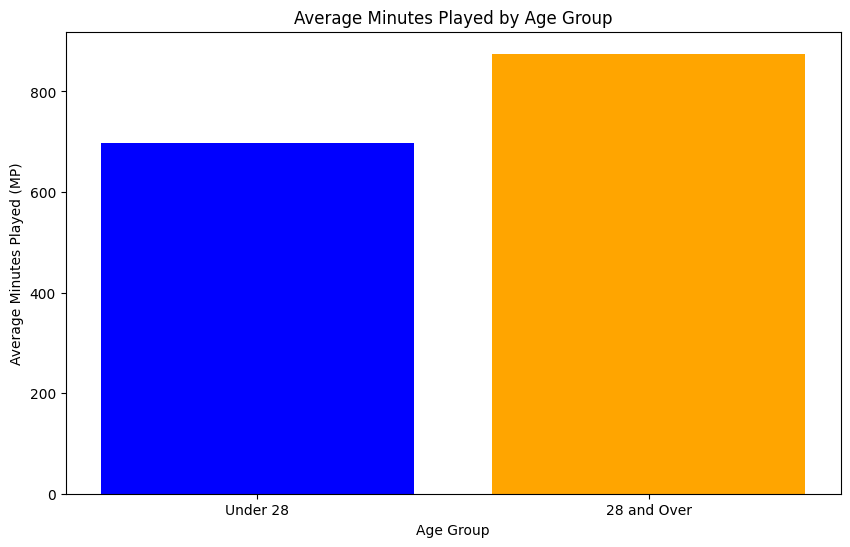

In [62]:
stat_df['Age Group'] = pd.cut(stat_df['Age'], bins=[0, 28, 100], labels=['Under 28', '28 and Over'])

# Calculate the average minutes played for each age group
avg_mp_by_age_group = stat_df.groupby('Age Group')['MP'].mean().reset_index()

# Plotting the average minutes played
plt.figure(figsize=(10, 6))
plt.bar(avg_mp_by_age_group['Age Group'], avg_mp_by_age_group['MP'], color=['blue', 'orange'])
plt.title('Average Minutes Played by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Minutes Played (MP)')
plt.show()

#### it is true that player that higher then 28 tend to got more times to play

## Let's see if game start impact the point

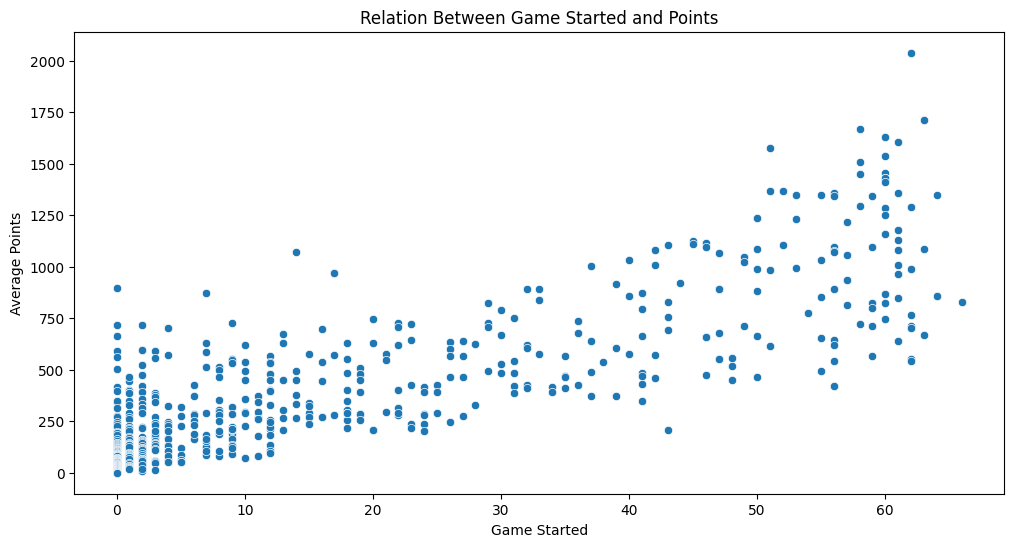

In [36]:
#let's see the relation between Game started and Points on average 
plt.figure(figsize=(12, 6))
sns.scatterplot(data=stat_df, x='GS', y='PTS')
plt.title('Relation Between Game Started and Points')
plt.xlabel('Game Started')
plt.ylabel('Average Points')
plt.show()

- usually the team put their best players in the starting line-up 

In [40]:
#let's see the relation between Pos and Defending stats
melted_def_df = stat_df.melt(id_vars=['Pos'], value_vars=['STL', 'BLK', 'TRB'], var_name='Stat', value_name='Value')


In [41]:
melted_def_df

,Pos,Stat,Value
0,PG,STL,112
1,SG,STL,72
2,C,STL,103
3,PF,STL,68
4,PG,STL,58
...,...,...,...
2059,C,TRB,1
2060,PF,TRB,1
2061,SG,TRB,0
2062,SF,TRB,2


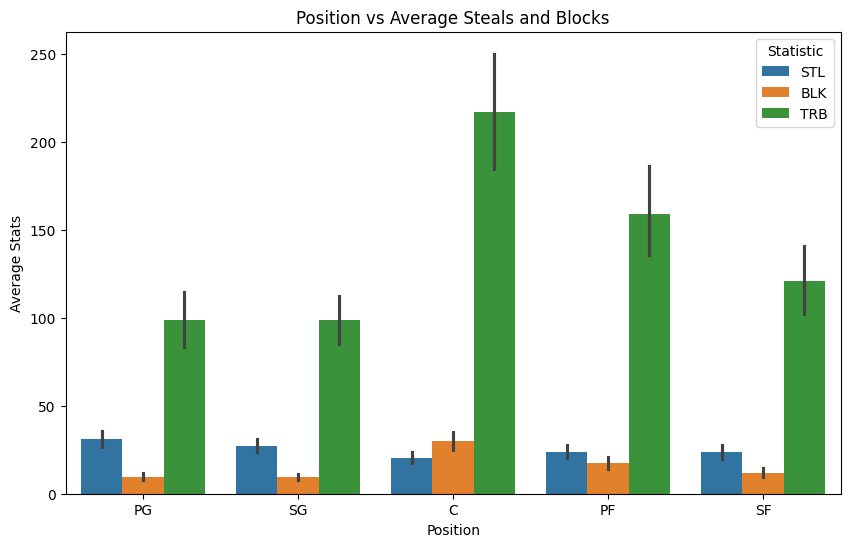

In [42]:
#let's visualize it
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_def_df, x='Pos', y='Value', hue='Stat')
plt.title('Position vs Average Steals and Blocks')
plt.xlabel('Position')
plt.ylabel('Average Stats')
plt.legend(title='Statistic')
plt.show()

- With the advantage of Height, C tends to got higher stat in Block and Rebound, while PG and Sg is not
- In contrast, since PG and SG is much more faster, they are more decisive in stealing the ball


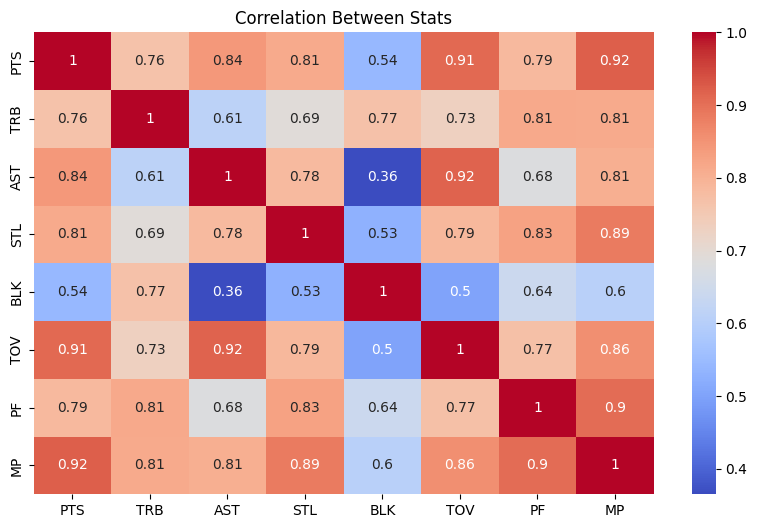

In [63]:
#let's see the corelation between the stats
plt.figure(figsize=(10, 6))
sns.heatmap(stat_df[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'MP']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Stats')
plt.show()

Strong Positive Correlations:

- PTS & MP: (0.92) – The more minutes a player plays, the higher their points tend to be.

- TOV & AST: (0.92) – Players who assist more often also tend to turn over the ball more.

- AST & MP: (0.89) – The more minutes a player plays, the more assists they tend to make.

- PF & MP: (0.90) – Longer playing time also tends to result in more personal fouls.

- PTS & AST: (0.84) – Scoring tends to be associated with making assists.

Moderate Positive Correlations:

- PTS & TRB: (0.76) – Players who score more tend to also grab more rebounds.

- TRB & MP: (0.81) – Longer playing time leads to more rebounds.

- PF & TOV: (0.77) – Higher turnovers are associated with more personal fouls.

Weak Correlations:

- BLK & AST: (0.36) – Blocking shots is not strongly related to making assists.

- BLK & PTS: (0.54) – Blocking shots is only weakly related to scoring points. 

## TO DO
- find top 10 player (calculate by their stat)
- get the data from their nearest 10 matches
- analysis the data
- build a model to predict the stat of these player in upcoming match